# Welcome to Colab!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# STEP 2: Define and Create a Project Folder
import os

# Define the path to your new project folder on Google Drive
# We'll call it 'CNN_Beginner_Project'
PROJECT_DIR = '/content/drive/My Drive/CNN_Beginner_Project'

# Create the directory if it doesn't already exist
os.makedirs(PROJECT_DIR, exist_ok=True)

print(f"Project directory created at: {PROJECT_DIR}")

Project directory created at: /content/drive/My Drive/CNN_Beginner_Project


In [3]:
### 100 Cases of Deep Learning - Convolutional Neural Networks (CNNs) for mnist handwritten number recognition | Day 1

In [25]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [26]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [27]:
## Data Preprocessing

In [28]:
# Normalization
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(f'New minimum pixel value is {X_train.min()}')
print(f'New maximum pixel value is {X_train.max()}')


New minimum pixel value is 0.0
New maximum pixel value is 1.0


In [29]:
# Categorical conversion ( One Hot Encoding )
from tensorflow.keras.utils import to_categorical

print(f'Original shape of y_train: {y_train.shape}')


num_classes = 10  # classes from ( 0 to 9) in cifar10.

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(f'Shape of y_train after one hot encoding: {y_train.shape}')


Original shape of y_train: (50000, 1)
Shape of y_train after one hot encoding: (50000, 10)


In [40]:
# Data Augumentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip = True,
    width_shift_range = 0.15,
    rotation_range = 15,
    height_shift_range = 0.15,
    zoom_range = 0.1
)

print('Data Augumentation generator defined')
train_generator = datagen.flow(
    X_train,
    y_train,
    batch_size = 32,
    shuffle = True
)

print('Augumented data flow created')





Data Augumentation generator defined
Augumented data flow created


In [41]:
## CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

###layer1
model.add(Conv2D(
    filters= 32,
    kernel_size = (3,3),
    input_shape = (32,32,3),
    activation = 'relu',
))
model.add(MaxPooling2D(
    pool_size = (2,2)
))
###layer2
model.add(Conv2D(
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu'
))
model.add(MaxPooling2D(
    pool_size = (2,2)
))
###Flatten layer
model.add(Flatten())
print('Added a Flatten layer to convert the 3D feature maps into 1D vectors')

model.add(Dropout(0.5))

# 1st Dense layer
model.add(Dense(
    units = 512,
    activation = 'relu'
))

model.add(Dense(
    units = 10,
    activation = 'softmax'
))

model.summary()

Added a Flatten layer to convert the 3D feature maps into 1D vectors


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,204,682 (4.60 MB)

 Trainable params: 1,204,682 (4.60 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# # Data Augumentation

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     horizontal_flip = True,
#     width_shift_range = 15
# )

# print('Data Augumentation generator defined')
# train_generator = datagen.flow(
#     X_train,
#     y_train,
#     batch_size = 32,
#     shuffle = True
# )

# print('Augumented data flow created')





In [43]:
## Model Compiling

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

print('Model compilied successfully!')

Model compilied successfully!


In [44]:
from IPython.core import history
## Training the model

steps_per_epoch = len(X_train)//32

history_aug = model.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 10,
    validation_data = (X_test, y_test)
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 112s 71ms/step - accuracy: 0.3389 - loss: 1.7870 - val_accuracy: 0.5447 - val_loss: 1.2743
Epoch 2/10
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 1:06 42ms/step - accuracy: 0.5938 - loss: 1.4801

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5938 - loss: 1.4801 - val_accuracy: 0.5456 - val_loss: 1.2841
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 135s 68ms/step - accuracy: 0.4831 - loss: 1.4286 - val_accuracy: 0.5981 - val_loss: 1.1177
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2812 - loss: 1.5486 - val_accuracy: 0.6036 - val_loss: 1.1096
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 110s 71ms/step - accuracy: 0.5283 - loss: 1.3115 - val_accuracy: 0.6319 - val_loss: 1.0247
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4375 - loss: 1.3311 - val_accuracy: 0.6315 - val_loss: 1.0292
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 134s 69ms/step - accuracy: 0.5605 - loss: 1.2295 - val_accuracy: 0.6475 - val_loss: 0.9979
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6562 - loss: 0.9806 - val_accuracy: 0.6492 - val_loss: 0.9960
Epoch 9/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 109s 69ms/step - accuracy: 0.5730 - loss: 1.2014 -

In [45]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 2)
print(f'Final test loss: {loss:.4f}')
print(f'Final test accuracy: {accuracy:.4f}')


313/313 - 3s - 11ms/step - accuracy: 0.6554 - loss: 0.9685
Final test loss: 0.9685
Final test accuracy: 0.6554


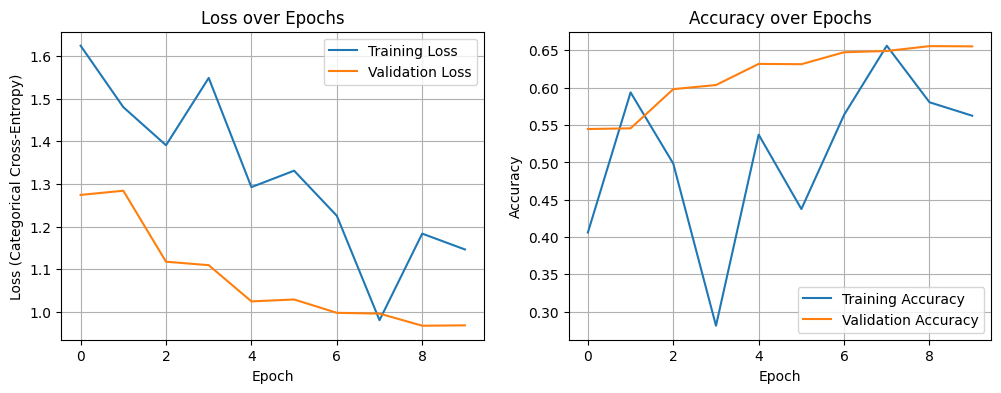

In [46]:
import matplotlib.pyplot as plt

# 1. Plotting Loss vs. Epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1) # First plot
plt.plot(history_aug.history['loss'], label='Training Loss')
plt.plot(history_aug.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Categorical Cross-Entropy)')
plt.legend()
plt.grid(True)


# [Images of Matplotlib line plot showing training and validation loss]


# 2. Plotting Accuracy vs. Epochs
plt.subplot(1, 2, 2) # Second plot
plt.plot(history_aug.history['accuracy'], label='Training Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.show()

Final prediction probability shape: (10000, 10)
